# Data packages

In [ ]:
import os
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
from PIL import Image
from IPython.display import display 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

Train data annotations

In [ ]:
train=pd.read_excel('//content/drive/MyDrive/original/Train_annotations.xlsx') #reading annotations csv file.
train.head

<bound method NDFrame.head of            annotations  Emotions
0      train_00001.jpg         5
1      train_00002.jpg         5
2      train_00003.jpg         4
3      train_00004.jpg         4
4      train_00005.jpg         5
...                ...       ...
12266  train_12267.jpg         7
12267  train_12268.jpg         7
12268  train_12269.jpg         7
12269  train_12270.jpg         7
12270  train_12271.jpg         7

[12271 rows x 2 columns]>

In [ ]:
import shutil

for i in range(0, 6):
  x = train[train.Emotions==i]
  names = x.annotations
  os.mkdir("//content/drive/MyDrive/original/train_1/" + str(i))
  for j in names:
    shutil.copy("//content/drive/MyDrive/original/train/" + j, 
    "//content/drive/MyDrive/original/train_1/" + str(i))

Test data anatations


In [ ]:
test=pd.read_excel("/content/drive/MyDrive/original/Test_annotations.xlsx")
test.head

<bound method NDFrame.head of         annotations  emotions
0     test_0001.jpg         5
1     test_0002.jpg         1
2     test_0003.jpg         4
3     test_0004.jpg         1
4     test_0005.jpg         5
...             ...       ...
3063  test_3064.jpg         7
3064  test_3065.jpg         7
3065  test_3066.jpg         7
3066  test_3067.jpg         7
3067  test_3068.jpg         7

[3068 rows x 2 columns]>

In [ ]:
for i in range(0, 6):
  x = test[test.emotions==i]
  names = x.annotations
  os.mkdir("/content/drive/MyDrive/original/test_1" + str(i))
  for j in names:
    shutil.copy("//content/drive/MyDrive/original/test/" + j, 
    "//content/drive/MyDrive/original/test_1/" + str(i))

Displaying the divided train dataset

In [ ]:
print(os.listdir('/content/drive/MyDrive/original/train_1'))
print(os.listdir('/content/drive/MyDrive/original/test_1'))

['0', '1', '2', '3', '4', '5']
['0', '1', '2', '3', '4', '5']


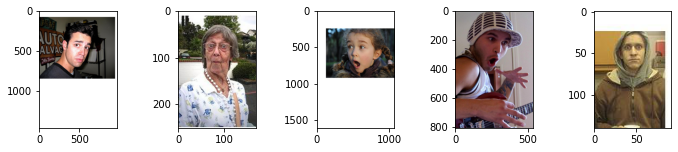

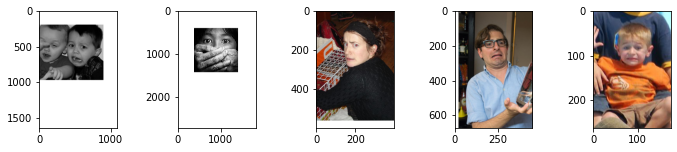

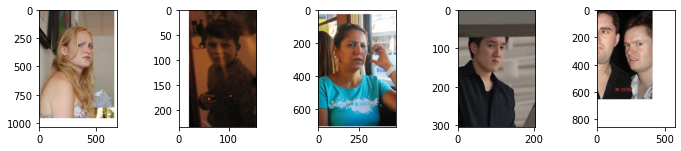

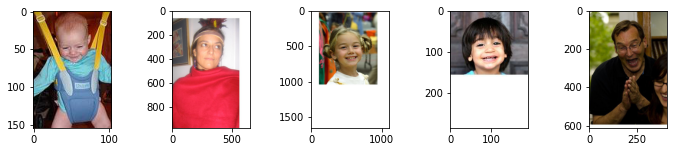

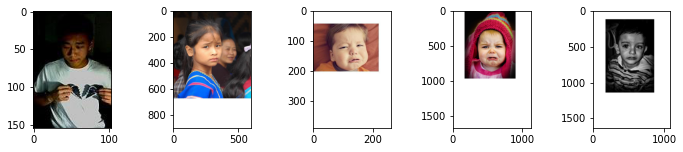

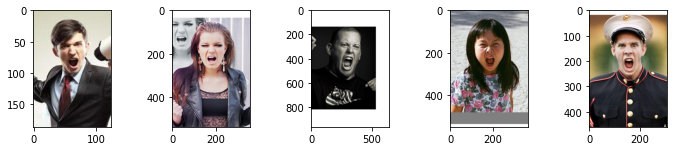

In [ ]:

def plot_imgs(item_dir, top=5):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 
data_path = '//content/drive/MyDrive/original/train_1/'

plot_imgs(data_path+'/0')
plot_imgs(data_path+'/1')
plot_imgs(data_path+'/2')
plot_imgs(data_path+'/3')
plot_imgs(data_path+'/4')
plot_imgs(data_path+'/5')

# Building face detection Model

In [ ]:

num_classes = 6
emotion_labels = ["Surprise","Fear","Disgust","Happy","Sad","Angry"]
target_size = (48, 48)

train_dir = '/content/drive/MyDrive/original/train_1'
val_dir   = '/content/drive/MyDrive/original/test_1'
test_dir  = '/content/drive/MyDrive/original/test_1'
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

        # Build Model
model = Sequential()
# 1st Conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd Conv layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3nd Conv layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# FC layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# summary layers
model.summary()

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

num_epochs = 50
step_size_train=train_generator.n//train_generator.batch_size
step_size_val =val_generator.n//val_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

# Train Model
history = model.fit_generator(train_generator, 
                    steps_per_epoch=step_size_train, 
                    epochs=num_epochs,  
                    verbose=1,
                    validation_data=val_generator,  
                    validation_steps=step_size_val) 



Found 9747 images belonging to 6 classes.
Found 3067 images belonging to 6 classes.
Found 3067 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
152/152 [==============================] - 3498s 23s/step - loss: 1.4658 - accuracy: 0.4855 - val_loss: 2.3298 - val_accuracy: 0.1439
Epoch 2/50
152/152 [==============================] - 104s 686ms/step - loss: 1.4069 - accuracy: 0.4900 - val_loss: 2.4534 - val_accuracy: 0.1459
Epoch 3/50
152/152 [==============================] - 104s 688ms/step - loss: 1.3909 - accuracy: 0.4949 - val_loss: 2.4506 - val_accuracy: 0.1489
Epoch 4/50
152/152 [==============================] - 104s 685ms/step - loss: 1.3689 - accuracy: 0.5045 - val_loss: 2.4390 - val_accuracy: 0.1459
Epoch 5/50
152/152 [==============================] - 104s 688ms/step - loss: 1.3499 - accuracy: 0.5071 - val_loss: 2.3950 - val_accuracy: 0.1556
Epoch 6/50
152/152 [==============================] - 104s 683ms/step - loss: 1.3211 - accuracy: 0.5155 - val_loss: 2.3853 - val_accuracy: 0.1599
Epoch 7/50
152/152 [==============================] - 104s 686ms/step - loss: 1.2729 - accuracy: 0.5308 - val_loss: 2.4325 - 

In [ ]:
# Save Model
model.save('model_cnn.h5') 

# Accuracy check

<Figure size 432x288 with 0 Axes>

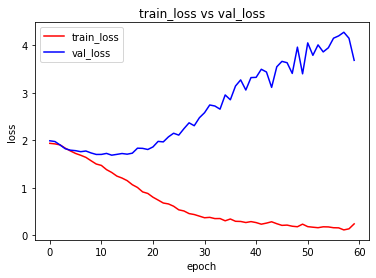

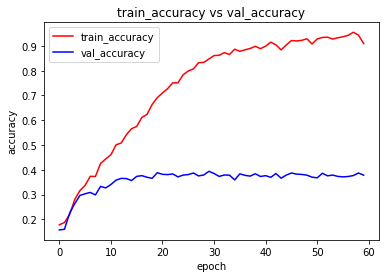

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_accuracy')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_accuracy vs val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()





In [ ]:
# Evaluate Model
result = model.evaluate_generator(test_generator, steps=step_size_test) 
print("Test Loss: " + str(result[0]))
print("Test Accuracy: " + str(result[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test Loss: 3.672173023223877
Test Accuracy: 0.3805803656578064


# Testing faces in the utilized database



(48, 48)
(1, 48, 48)
0
Surprise


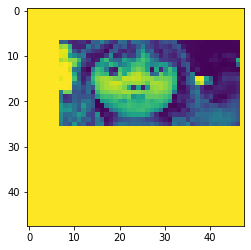

In [ ]:
opDict = {0:'Surprise',1:'Fear',2:'Disgust',3:'Happy',4:'sad',5:'angry'}
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
img = image.load_img("/content/drive/MyDrive/original/test_1/0/test_0002.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("/content/drive/MyDrive/original/model/model_cnn.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

(48, 48)
(1, 48, 48)
5
angry


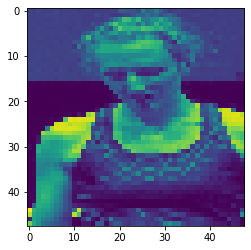

In [ ]:
opDict = {0:'Surprise',1:'Fear',2:'Disgust',3:'Happy',4:'sad',5:'angry'}
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
img = image.load_img("/content/drive/MyDrive/original/test_1/1/test_0089.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("/content/drive/MyDrive/original/model/model_cnn.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

(48, 48)
(1, 48, 48)
3
Happy


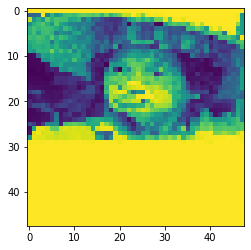

In [ ]:
opDict = {0:'Surprise',1:'Fear',2:'Disgust',3:'Happy',4:'sad',5:'angry'}
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
img = image.load_img("/content/drive/MyDrive/original/test_1/3/test_0152.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("/content/drive/MyDrive/original/model/model_cnn.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

(48, 48)
(1, 48, 48)
4
sad


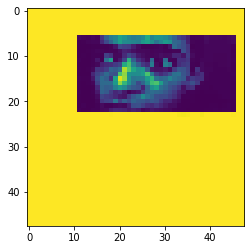

In [ ]:
opDict = {0:'Surprise',1:'Fear',2:'Disgust',3:'Happy',4:'sad',5:'angry'}
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
img = image.load_img("/content/drive/MyDrive/original/test_1/4/test_0243.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("/content/drive/MyDrive/original/model/model_cnn.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

(48, 48)
(1, 48, 48)
1
Fear


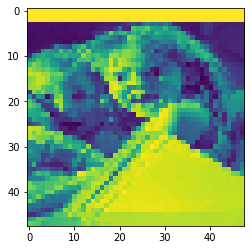

In [ ]:
opDict = {0:'Surprise',1:'Fear',2:'Disgust',3:'Happy',4:'sad',5:'angry'}
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
img = image.load_img("/content/drive/MyDrive/original/train_1/1/train_07173.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("/content/drive/MyDrive/original/model/model_cnn.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()